In [139]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mplmpl
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### The normal equation

In [87]:
import numpy as np

np.random.seed(42)
m =100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

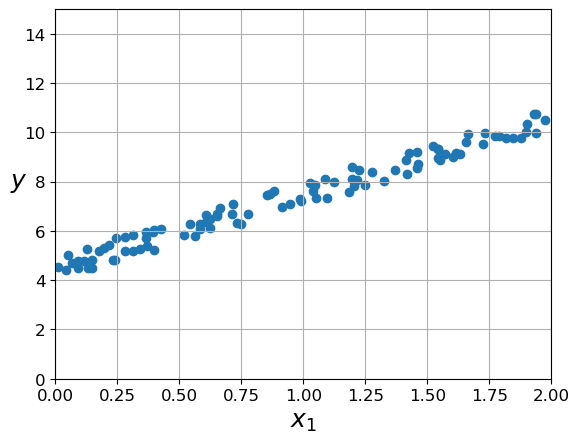

In [88]:
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.grid(True)

In [89]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.51359766],
       [2.98323418]])

In [90]:
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


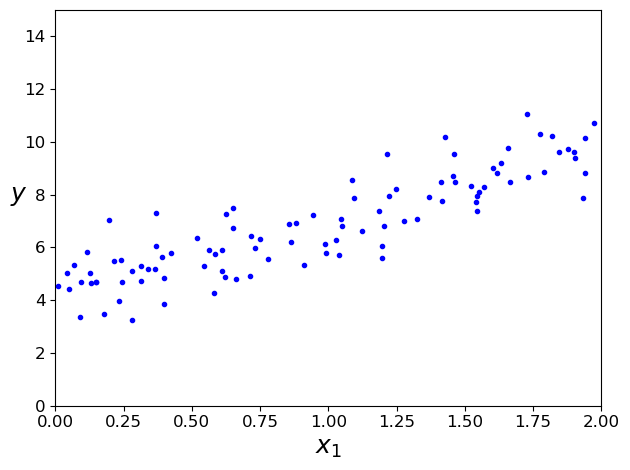

In [91]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [92]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [93]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [94]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

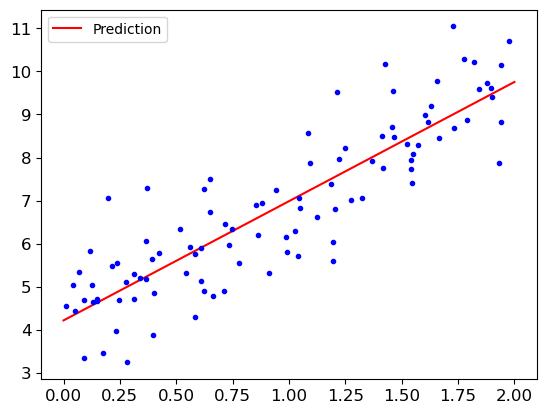

In [95]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### batch gradient descent

In [97]:
eta = 0.1 # learning rate
n_epochs = 1000 # Each iteration over the training set is called an epoch
m = len(X_b) # number of instances

np.random.seed(42)
# randn -> Return a sample (or samples) from the “standard normal” distribution
theta = np.random.randn(2, 1) # randomly initialised model parameters

for i in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [98]:
theta

array([[4.21509616],
       [2.77011339]])

In [99]:
theta

array([[4.21509616],
       [2.77011339]])

### Stochastic Gradient Descent

In [100]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.rand(2,1)

for epoch in range(n_epochs):     
    for iteration in range(m):         
        random_index = np.random.randint(m)         
        xi = X_b[random_index : random_index + 1]         
        yi = y[random_index : random_index + 1]         
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m         
        eta = learning_schedule(epoch * m + iteration)         
        theta = theta - eta * gradients

In [101]:
theta

array([[4.21047895],
       [2.74881457]])

### SGD regressor

In [102]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets and ravel convert it into 1D
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

### Polynomial Regression

In [103]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m ,1)

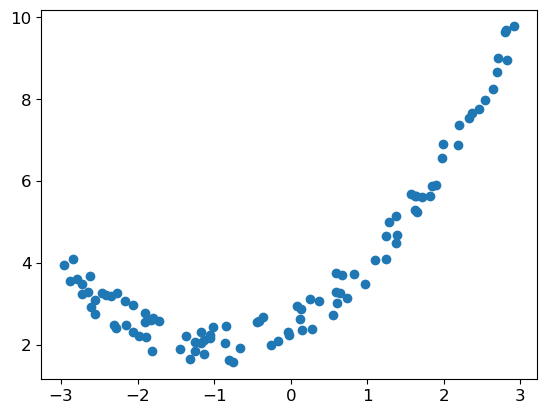

In [104]:
plt.scatter(X, y)

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [106]:
X_poly[0] # X_poly now contains the original feature of X plus the square of this feature, which presents 0.5 * . X ** 2 + X

array([-0.75275929,  0.56664654])

In [107]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

### learning curves

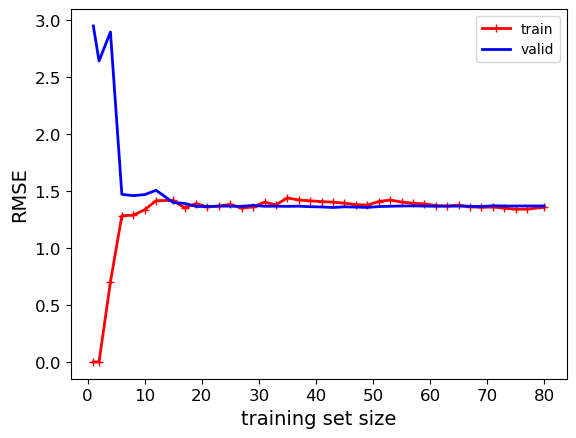

In [108]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_scores = -train_scores.mean(axis=1)
valid_scores = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_scores, "b-", linewidth=2, label="valid")
plt.ylabel("RMSE")
plt.xlabel("training set size")
plt.legend()

### overfitting

In [109]:
from sklearn.pipeline import make_pipeline

pjolynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    pjolynomial_regression, X, y, train_sizes=np.linspace(0.01, 1, 40), cv=5, scoring="neg_root_mean_squared_error"
)

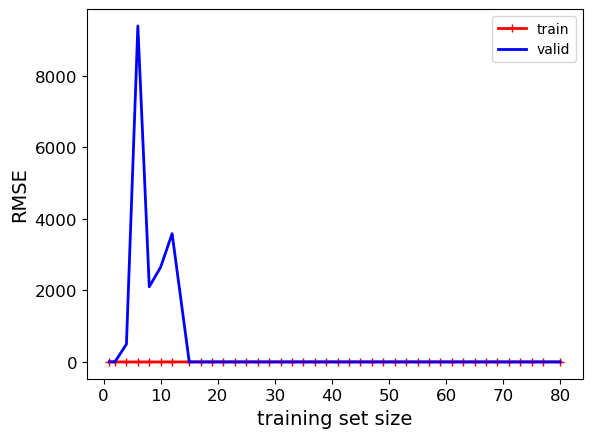

In [110]:
train_scores = -train_scores.mean(axis=1)
valid_scores = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_scores, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_scores, "b-", linewidth=2, label="valid")
plt.ylabel("RMSE")
plt.xlabel("training set size")
plt.legend()

### Ridge Regression

In [111]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=0.1, solver='cholesky')

In [112]:
ridge_reg.predict([[1.5]])

array([[5.44714236]])

### using stochastic Gradient Descent

In [116]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(alpha=0.001, random_state=42, tol=None)

In [117]:
sgd_reg.predict([[1.5]])

array([5.44590102])

### Lasso Regression

In [118]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.3944001])

In [123]:
#### althernative way to replicate lasso regression

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l1", alpha=0.1)
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/liuyifu/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.38152146])

### Elastic Net

In [125]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.39746654])

### Early Stop

In [ ]:
# from copy import deepcopy
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# X_

### Decision Boundaries

In [140]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [144]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [145]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [146]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [149]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [157]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

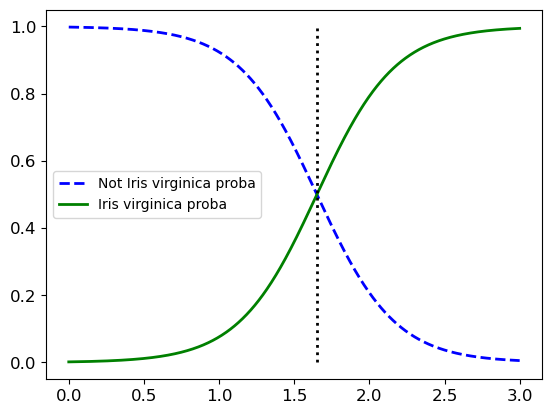

In [190]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1]>0.5][0,0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2)
plt.legend()
plt.show()

In [200]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values 
y = iris["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  
softmax_reg = LogisticRegression(C=30, random_state=42) 
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [203]:
softmax_reg.predict([[5,2]])

array([2])

In [205]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

In [206]:
import numpy as np

# Sample data
X = np.random.rand(1000, 16384)
y = np.random.randint(1, 4, size=1000)

# Print shape of data and labels
print('Data shape:', X.shape)
print('Labels shape:', y.shape)

Data shape: (1000, 16384)
Labels shape: (1000,)


In [214]:
set(y)

{1, 2, 3}